# Stroke factors
### Project 1
#### Kaito Miyamoto & Rebecca Christodoulou

### The stroke prediction dataset:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

In this project, we are analyzing the key factors that contribute to the risk of stroke, based on the analysis of various health indicators such as age, gender, glucose levels, hypertension, and heart disease.
The data reveals clear trends in stroke occurrence across different demographics and health conditions.

#### The dataset has 12 variables.
* id: unique identifier
* gender: "Male", "Female", "Other"
* age: age of the patient
* hypertension: 0 if no hypertension, otherwise 1
* heart_disease: 0 if no heart diseases, otherwise 1
* ever_married: "No", "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private", "Self-employed"
* Residence_type: "Rural", "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes", "Unknown"
* stroke: 1 if a stroke, otherwise 0

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os

In [6]:
os.environ["OMP_NUM_THREADS"] = "4"

In [7]:
data = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
data.shape

(5110, 12)

In [9]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

We have 4 integers, 3 floats, and 5 objects in the dataset.

We will drop "id", "ever married", "work type", "Residence type", "bmi", and "smoking status" from the dataset to focus on the specific health indicators.

In [11]:
data.drop(["id", "ever_married", "work_type", "Residence_type", "bmi", "smoking_status"], axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,stroke
0,Male,67.0,0,1,228.69,1
1,Female,61.0,0,0,202.21,1
2,Male,80.0,0,1,105.92,1
3,Female,49.0,0,0,171.23,1
4,Female,79.0,1,0,174.12,1


## Cleaning data

In [13]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
stroke               0
dtype: int64

In [14]:
print(data.gender.value_counts(), "\n")
print(data.hypertension.value_counts(), "\n")
print(data.heart_disease.value_counts(), "\n")
print(data.stroke.value_counts(), "\n")

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

hypertension
0    4612
1     498
Name: count, dtype: int64 

heart_disease
0    4834
1     276
Name: count, dtype: int64 

stroke
0    4861
1     249
Name: count, dtype: int64 



We will remove "other" from gender since it has only one value.

In [16]:
data = data.loc[data.gender != "Other"]
data.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

## Data grouped by age and gender

In [18]:
age_labels = ["<=40", "40-60", "60-75", "75+"]
data["age_group"] = pd.cut(data["age"], bins=[0, 40, 60, 75, np.inf], labels=age_labels)

grouped_data = data.groupby(["age_group", "gender"], observed=True).agg(
    stroke_rate=("stroke", "mean"),
    total=("stroke", "size")).reset_index()

print("Grouped data by age and gender:")
grouped_data

Grouped data by age and gender:


,age_group,gender,stroke_rate,total
0,<=40,Female,0.006065,1319
1,<=40,Male,0.000000,924
2,40-60,Female,0.037199,914
3,40-60,Male,0.046296,648
4,60-75,Female,0.088608,474
5,60-75,Male,0.106849,365
6,75+,Female,0.198606,287
7,75+,Male,0.219101,178


Under 40 years old, stroke rates are lower for both genders. From the age group 40-60, males have a higher stroke than females with largest values in total. Moving on to the next age group, 60-75, the males also have a higher stroke rate than the females, and both genders have more than twice the stroke rate than the age group 40-60. And for our last age group, more than 75 years old, males have the greatest stroke rate, with more than twice the stroke rate compared to the age group 60-75.


 
 This data suggests that both age and gender are important factors in stroke risk. The stroke rate increases with age for both genders, but males are at a consistently higher risk of stroke than females, particularly as they grow older. The highest stroke risk is observed in males aged 75 and older, who have a significantly higher rate than any other group.

## Comparing glucose levels

In [21]:
stroke = data[data.stroke == 1]
non_stroke = data[data.stroke == 0]

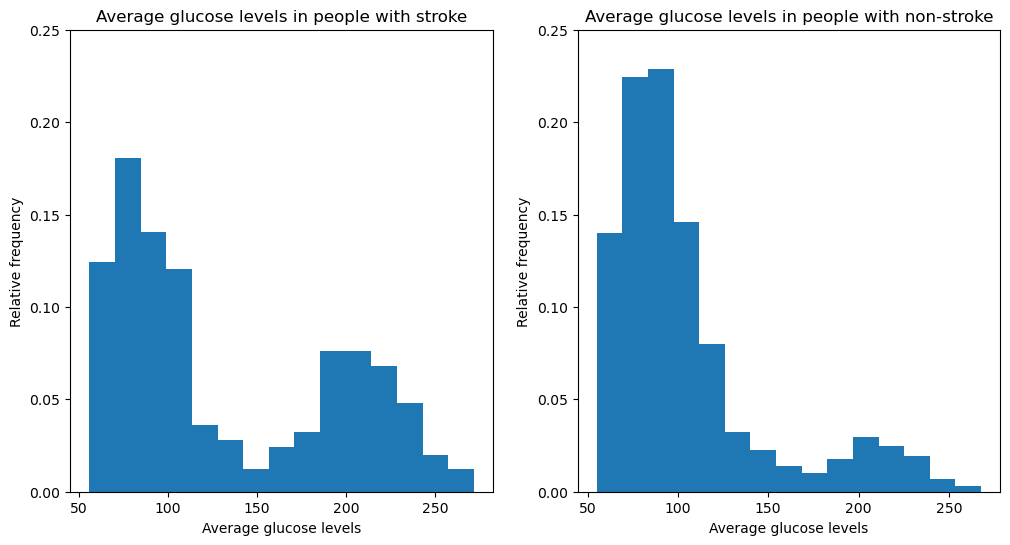

Average glucose levels in people with stroke
Mean: 132.5
Median: 105.2 

Average glucose levels in people with non-stroke
Mean: 104.8
Median: 91.5


In [22]:
fig = plt.figure(figsize = [12,6])
stroke_glucose = stroke.avg_glucose_level
non_stroke_glucose = non_stroke.avg_glucose_level

plt.subplot(1,2,1)
plt.hist(stroke_glucose, bins=15, weights=np.ones_like(stroke_glucose) / len(stroke_glucose))
plt.title("Average glucose levels in people with stroke")
plt.xlabel("Average glucose levels")
plt.ylabel("Relative frequency")
plt.ylim(0, 0.25)

plt.subplot(1,2,2)
plt.hist(non_stroke_glucose, bins=15, weights=np.ones_like(non_stroke_glucose) / len(non_stroke_glucose))
plt.title("Average glucose levels in people with non-stroke")
plt.xlabel("Average glucose levels")
plt.ylabel("Relative frequency")
plt.ylim(0, 0.25)

plt.show()

import statistics
print("Average glucose levels in people with stroke")
print("Mean: %.1f" % statistics.mean(stroke_glucose))
print("Median: %.1f" % statistics.median(stroke_glucose), "\n")

print("Average glucose levels in people with non-stroke")
print("Mean: %.1f" % statistics.mean(non_stroke_glucose))
print("Median: %.1f" % statistics.median(non_stroke_glucose))

The histograms demonstrate the distributions of average glucose levels in individuals with stroke compared to those without a stroke.  

From the first histogram there is a peak around 75 glucose levels, similar to non-stroke individuals. We observe an incremental change around 150–200 glucose levels, compared to the non-stroke. On the other hand, the majority of non-stroke individuals have glucose levels concentrated in the 50–100 range, with a peak around 75. Beyond this range, there is a sharp decline in the relative frequency, with glucose levels above 150 becoming less common. There is, however, a small but noticeable change extending into higher glucose levels, showing that some non-stroke individuals still experience glucose levels between 150 and 250. It suggests that while lower glucose levels are prevalent in non-stroke individuals, there is still variation, with a minority of the population showing elevated glucose levels. People with strokes may have a wider range of glucose levels, with a significant proportion showing elevated levels. It implies that elevated glucose levels could be a contributing factor in stroke occurrences.

C:\Users\kaito\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


  age_group  stroke_rate  avg_glucose_level
0      <=40     0.003567          95.643005
1     40-60     0.040973         107.936665
2     60-75     0.096544         122.072932
3       75+     0.206452         121.995226


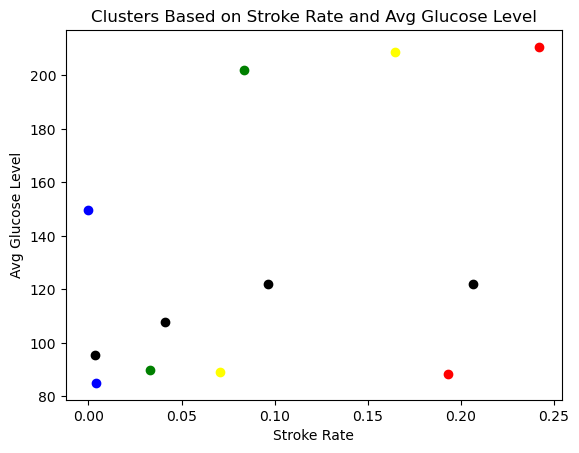

In [24]:
from sklearn.cluster import KMeans

num_clusters = 2
color_labels = ["blue", "green", "yellow", "red"]
age_colors = dict(zip(age_labels, color_labels))

for each_group in age_labels:
    group_data = data[data.age_group == each_group]
    group_data = group_data[["stroke", "avg_glucose_level"]].values
    model = KMeans(num_clusters)
    model.fit(group_data)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color=age_colors[each_group])

grouped_data = data.groupby('age_group', observed=True).agg(
    stroke_rate=("stroke", "mean"),
    avg_glucose_level=("avg_glucose_level", "mean")).reset_index()
print(grouped_data)
plt.scatter(grouped_data["stroke_rate"], grouped_data["avg_glucose_level"], color="black")

plt.title("Clusters Based on Stroke Rate and Avg Glucose Level")
plt.xlabel("Stroke Rate")
plt.ylabel("Avg Glucose Level")
plt.show()

The scatter plots show different clusters based on stroke rate and average glucose levels. The two clusters within each group are visually distinct in their glucose levels and stroke rates.

* Blue: <=40 years old
* Green: 40-60 years old
* Yellow: 60-75 years old
* Red: 75+ years old
* Black: average of each age group

Based on the age groups represented by the same color, the clusters are divided into lower and higher average glucose levels. The higher levels have a higher stroke rate than the lower levels, except for the group under 40 years old, and the changes of three points, including the averages, are linear. 

When comparing average glucose levels, there are three groups divided into the lower, average, and higher glucose levels, each with four points. At the lower levels, the change is not significant, but the other two groups show exponential changes.

Stroke rates tend to increase with age and higher glucose levels, as demonstrated by the clusters. The older not only has higher glucose levels but also a significantly higher stroke rate. This analysis suggests that age and glucose levels are key factors influencing stroke risk, with older individuals and those with higher glucose levels being more vulnerable to strokes.

## Hypertension & heart disease

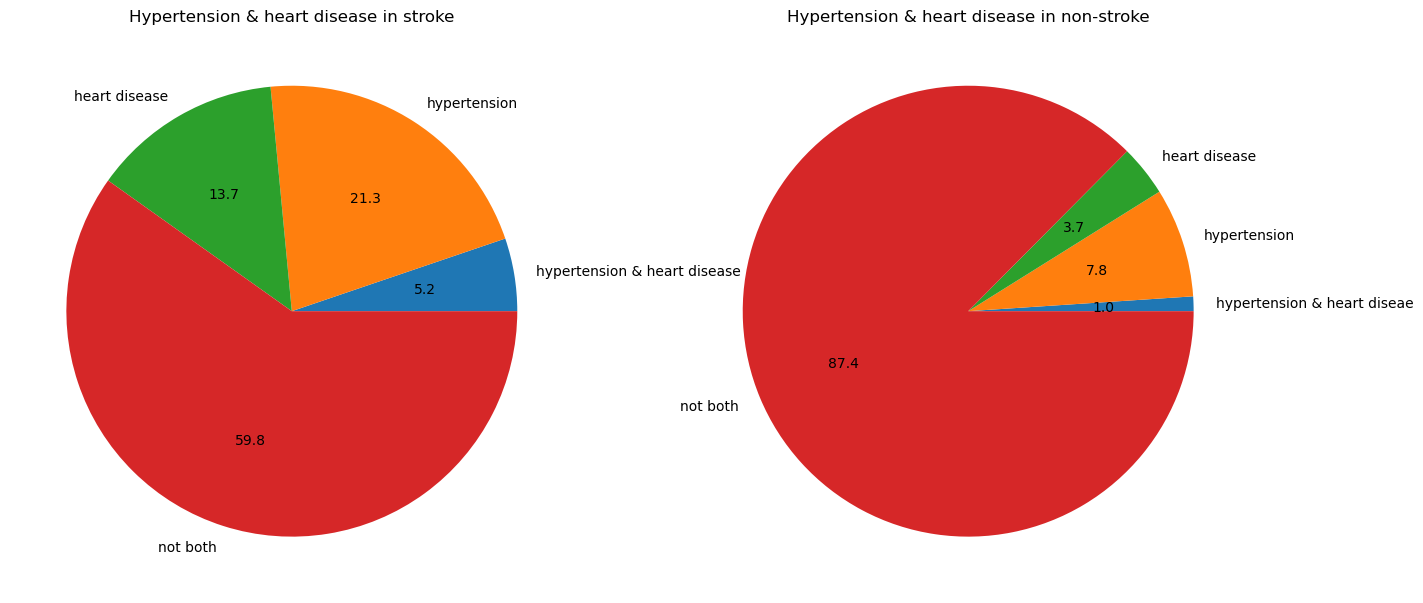

In [27]:
fig = plt.figure(figsize = [16,16])

stroke_hyp_and_heart = stroke[(stroke.hypertension == 1) & (stroke.heart_disease == 1)]
stroke_hyp = stroke[(stroke.hypertension == 1) & (stroke.heart_disease == 0)]
stroke_heart = stroke[(stroke.hypertension == 0) & (stroke.heart_disease == 1)]
stroke_none = stroke[(stroke.hypertension == 0) & (stroke.heart_disease == 0)]
plt.subplot(1,2,1)
plt.pie([len(stroke_hyp_and_heart), len(stroke_hyp), len(stroke_heart), len(stroke_none)], 
        labels=["hypertension & heart disease", "hypertension", "heart disease", "not both"], autopct="%.1f")
plt.title("Hypertension & heart disease in stroke")

non_stroke_hyp_and_heart = non_stroke[(non_stroke.hypertension == 1) & (non_stroke.heart_disease == 1)]
non_stroke_hyp = non_stroke[(non_stroke.hypertension == 1) & (non_stroke.heart_disease == 0)]
non_stroke_heart = non_stroke[(non_stroke.hypertension == 0) & (non_stroke.heart_disease == 1)]
non_stroke_none = non_stroke[(non_stroke.hypertension == 0) & (non_stroke.heart_disease == 0)]
plt.subplot(1,2,2)
plt.pie([len(non_stroke_hyp_and_heart), len(non_stroke_hyp), len(non_stroke_heart), len(non_stroke_none)], 
        labels=["hypertension & heart diseae", "hypertension", "heart disease", "not both"], autopct="%.1f")
plt.title("Hypertension & heart disease in non-stroke")
plt.show()

### Hypertension & heart disease in stroke

The pie chart includes: hypertension and heart disease in stroke individuals into four categories:

* 59.8% of individuals have neither hypertension nor heart disease.

* 21.3% of individuals have hypertension without heart disease.

* 13.7% have heart disease without hypertension.

* 5.2% have both hypertension and heart disease.

This distribution suggests that the majority of stroke individuals do not have either condition, while the remainder, about 40%, shows instances of either hypertension or heart disease. However, only a small proportion experience both conditions simultaneously. This implies that having either hypertension or heart disease is not necessarily linked to stroke, but other factors could be influencing stroke incidence in individuals with these conditions.

### Hypertension & heart disease in non-stroke

The chart shows that the majority of non-stroke individuals do not have both hypertension and heart disease.

* 87.4% do not have either

* 7.8% have hypertension without heart disease.

* 3.7% have heart disease without hypertension.

* 1.0% of non-stroke individuals have both hypertension and heart disease.

This suggests that most non-stroke individuals are free from both conditions, with only a small percentage, about 13%, dealing with either or both.

## Relevance to stroke: correlation heatmap.

In [33]:
data["gender"] = np.uint8(data.gender=="Male")
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,stroke,age_group
0,1,67.0,0,1,228.69,1,60-75
1,0,61.0,0,0,202.21,1,60-75
2,1,80.0,0,1,105.92,1,75+
3,0,49.0,0,0,171.23,1,40-60
4,0,79.0,1,0,174.12,1,75+


In [34]:
order = ["gender", "age", "avg_glucose_level", "hypertension", "heart_disease", "stroke"]
data = data[order]
data.head()

,gender,age,avg_glucose_level,hypertension,heart_disease,stroke
0,1,67.0,228.69,0,1,1
1,0,61.0,202.21,0,0,1
2,1,80.0,105.92,0,1,1
3,0,49.0,171.23,0,0,1
4,0,79.0,174.12,1,0,1


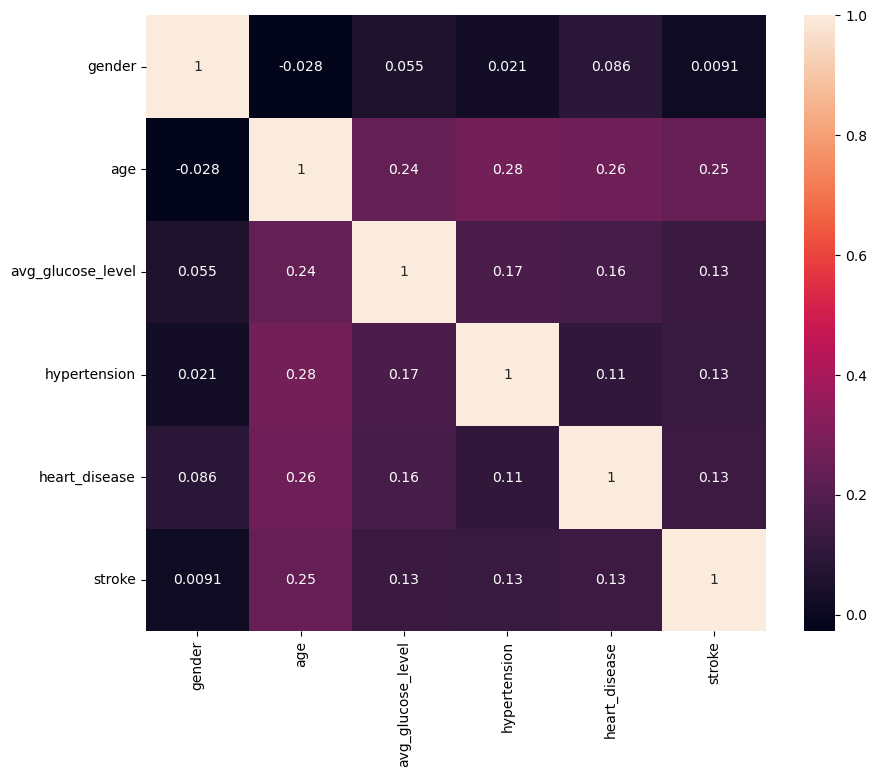

In [35]:
import seaborn as sn

plt.figure(figsize=(10,8))
dataplot = sn.heatmap(data.corr(), annot=True)
  
plt.show()

The heatmap shows the relationships between different health factors and stroke incidence.

* Age and Stroke: Age shows a moderate positive correlation with stroke, suggesting that older individuals are more likely to experience strokes.

* Heart Disease and Stroke: There is a positive correlation between heart disease and stroke, indicating that one is a factor of each other.

* Average Glucose Level and Stroke: The average glucose level has a positive correlation with stroke, indicating that elevated glucose levels could potentially be a factor.

* Hypertension and Stroke: Hypertension also correlates with stroke, which aligns with the statement that high blood pressure can cause a stroke.

Overall, the data suggest that factors like age, hypertension, and glucose levels have some association with stroke. 

### Relevance to stroke
#### gender < avg_glucose_level, hypertension, heart_disease < age

## Logistic Regression

In [39]:
labels = np.array(data.stroke)
data.drop(["stroke"], axis=1, inplace=True)
data.head()

,gender,age,avg_glucose_level,hypertension,heart_disease
0,1,67.0,228.69,0,1
1,0,61.0,202.21,0,0
2,1,80.0,105.92,0,1
3,0,49.0,171.23,0,0
4,0,79.0,174.12,1,0


#### Testing 20%

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver="lbfgs",
                         multi_class="multinomial", max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

<Axes: >

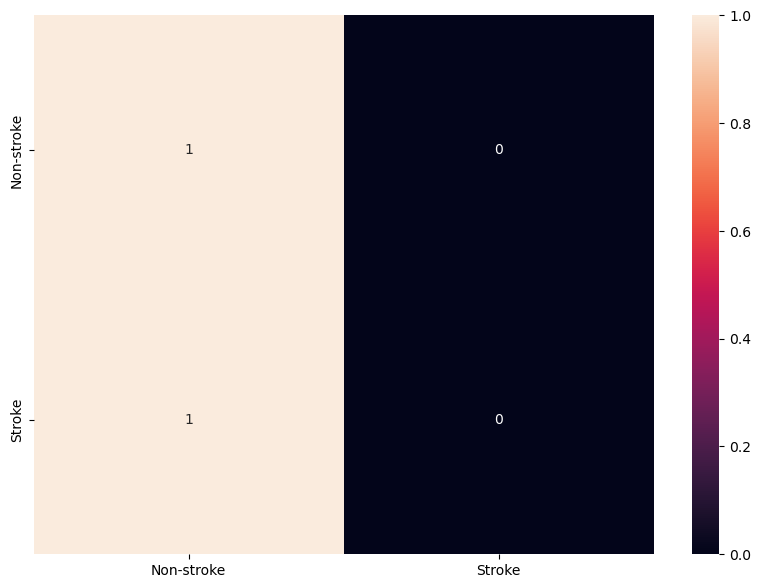

In [43]:
import seaborn as sn
numClasses = 2
labels = ["Non-stroke", "Stroke"]
conf = np.zeros([numClasses, numClasses])
guesses = model.predict(X_test)

for patient in range(len(y_test)):
    real = y_test[patient]
    guess = guesses[patient]
    conf[real, guess] = conf[real, guess] + 1
 
rowsums = np.sum(conf, 1)
rowsums = np.reshape(rowsums, [numClasses, 1])
rowsums = np.repeat(rowsums, numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in labels], columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [44]:
print(model.score(X_test, y_test))

0.9393346379647749


In [45]:
print("The number of stroke in the test data: ", np.sum(y_test == 1))
print("The number of non-stroke in the test data", np.sum(y_test == 0))
print("The total number in the test data: ", len(y_test))

The number of stroke in the test data:  62
The number of non-stroke in the test data 960
The total number in the test data:  1022


Using the logistic regression model we can see that there is an accuracy of approximately 93.93%. This indicates that the model is effective. However, the confusion matrix shows that the model made 1 correct prediction for “Non-stroke” and no prediction for “Stroke,” which suggests the model might not predict stroke well because of the difference of the total number between stroke and non-stroke.

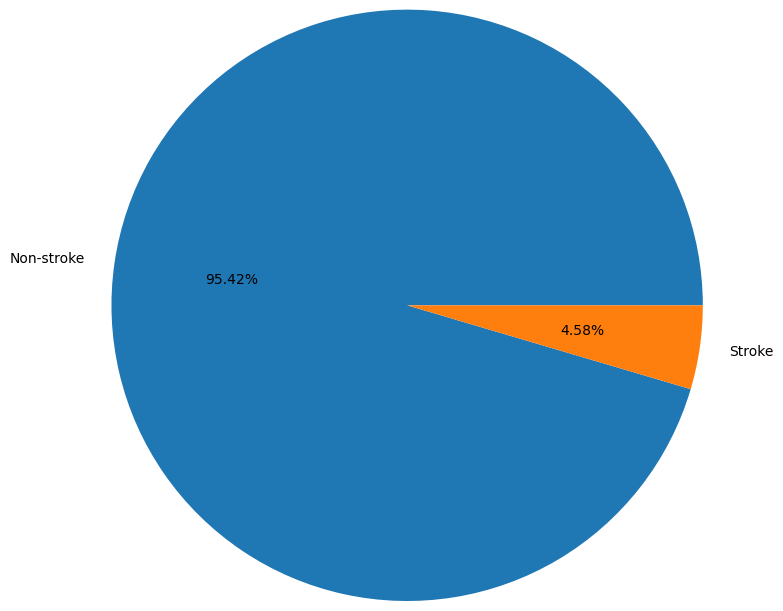

In [47]:
stroke = np.sum(y_train)
non_stroke = len(y_train) - stroke
plt.pie([non_stroke, stroke], labels=["Non-stroke", "Stroke"], radius=2, autopct="%.2f%%")
plt.show()

The pie chart shows around 95.42% of the samples are “Non-stroke,” and 4.58% are “Stroke” from the train data.

In conclusion, our analysis reveals several key factors influencing stroke risk, including age, gender, glucose levels, hypertension, and heart disease. Stroke rates increase with age for both genders, but males are at a higher risk, especially those aged more than 75. Elevated glucose levels also appear to be linked to stroke occurrences, with stroke patients showing a higher range of glucose levels compared to non-stroke individuals. Health conditions like hypertension and heart disease are associated with stroke risk, but the data indicates that the majority of non-stroke individuals do not suffer from these conditions, suggesting that other variables play significant roles. The logistic regression model, with an accuracy of 93.93%, further reinforces the effectiveness of our analysis.